# Nerual Network for Classifying fine-grained images

In [2]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import os
from libcpab.libcpab.pytorch import cpab
from libcpab.libcpab.helper.utility import show_images

In [3]:
def from_png_to_jpg(dir_path=None, save_path=None, color=(0,0,0)):
    """
    Converts PNG files (RGBA) to JPG files (RGB), by removing the alpha channel.
    
    Args
        dir_path: directory path to files to be converted.
        save_path: directory path where converted files should be saved.
    """
    
    if not dir_path or not save_path:
        print("Please specify both paths.")
    
    filenames = [name for name in os.listdir(dir_path) if os.path.isfile(dir_path+name)]
    
    for filename in filenames:
        im = Image.open(dir_path+filename)
        im.load() # required for im.split()
        
        newIm = Image.new("RGB", im.size, color=color) # black - RGB(0,0,0) - background color
        newIm.paste(im, mask=im.split()[3]) # 3 is the alpha channel
        filename = filename.replace(".png", ".jpg") # change filename to be saved as from .png to .jpg
        newIm.save(save_path+filename, "JPEG", quality=80)

In [7]:
# Create subfolders for each class in ../classes.jpg/

root_dir = "./data/dataset_v2/training_imagery/"
list_of_classes = [name for name in os.listdir(root_dir+"classes/") if os.path.isdir(root_dir+"classes/"+name)]

for cls in list_of_classes:
    os.mkdir(root_dir+"classes_jpg/"+cls)

In [8]:
# Convert images in one class folder at a time and save in ../classes_jpg/{class}

png_dir = "./data/dataset_v2/training_imagery/classes/"
jpg_dir = "./data/dataset_v2/training_imagery/classes_jpg/"

for dir_name in [name for name in os.listdir(png_dir) if os.path.isdir(png_dir+name)]:
    from_png_to_jpg(dir_path=png_dir+dir_name+"/", save_path=jpg_dir+dir_name+"/") 

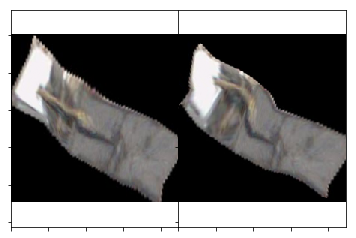

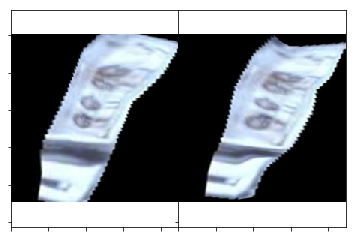

In [52]:
def upsample(root_path=None, num_samples=None, show_imgs=False, save_images=True, DIM=224):
    """
    Upsample data with CPAB technique.
        
        Args
            root: Directory of data to be sampled.
            num_samples: Number of samples.
    """
    
    if not root_path:
        print("No directory specified.")
        return 0
        
    if not num_samples:
        print("Please specify the number of samples.")
        return 0
    
    # get filenames
    filenames = [name for name in os.listdir(root_path) if os.path.isfile(root_path+name)]
    
    # placeholder for transformed data
    tmp = []
    i = 0
    for filename in filenames:
        i += 1
        # Number of transformed samples 
        N = num_samples

        # Load some data
        data = plt.imread(root_path+filename) / 255
        data = np.tile(np.expand_dims(data, 0), [N,1,1,1]) # create batch of data

        # Convert to torch tensor and torch format [n_batch, n_channels, width, height]
        data = torch.Tensor(data).permute(0,3,1,2)

        # Define transformer class
        T = cpab(tess_size=[3,3], device='cpu')

        # Sample random transformation
        theta = 0.5*T.sample_transformation(N)

        # Transform the images
        transformed_data = T.transform_data(data, theta, outsize=(DIM, DIM))

        # Get the corresponding numpy arrays in correct format [n_batch, width, height, n_channels]
        transformed_data = transformed_data.permute(0, 2, 3, 1).cpu().numpy()
        
        if show_imgs:
            show_images(transformed_data)
        
        if save_images:
            n = 0
            for img in transformed_data:
                image = img * 255 # pixel interval [0,255]
                new_filename = "aug"+str(n)+"_"+filename
                im = Image.fromarray(image.astype('uint8'), mode="RGB")
                im.save(os.path.join(root_path, "augmented", new_filename))
                
                n += 1
                
        tmp.append(transformed_data)
        
    return tmp
        
trans_data = upsample(root_path='./data/dataset_v2/training_imagery/classes_jpg/ladder/', 
                      num_samples=2, 
                      show_imgs=True, 
                      save_images=True)

In [45]:
len(trans_data[0][0])

224

In [41]:
a = trans_data[1][1,:,:,:] * 255
a.shape

newIm = np.empty(a.shape, dtype='uint8')
newIm[:,:,:] = a[:,:,:]
newIm[1]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

In [42]:
im = Image.fromarray(newIm, mode="RGB")
im.save("./data/dataset_v2/test/test1.jpg")

In [ ]:
for img in range(len(transformed_data)):
    transformed_im = Image.fromarray(transformed_data[img,:,:,:], "RGB")
    transformed_im = newIm.resize((256,256),Image.BICUBIC)
    transformed_im.save(os.path.join(root_path, "augmented/", f"aug{str(i)}"+filename))

In [8]:
for im in trans_data:
    print(im[0].shape)

(224, 224, 3)
(224, 224, 3)


In [134]:
trans_data[0][0,:,:,:]

array([[[1.        , 1.        , 1.        ],
        [0.9724591 , 0.9724591 , 0.9724591 ],
        [0.9449029 , 0.9449029 , 0.9449029 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.8242035 , 0.8242035 , 0.8242035 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99999994, 0.99999994, 0.99999994],
        [0.64797974, 0.64797974, 0.64797974]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99999994, 0

In [74]:
DIR = "./data/dataset_v2/"

from_png_to_jpg(dir_path=DIR+"training_imagery/classes/harnessed_to_a_cart/", save_path=DIR+"test/")

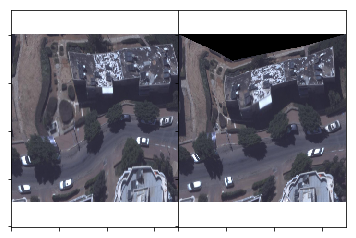

In [56]:

#%%
if __name__ == '__main__':
    # Number of transformed samples 
    N = 2
    
    # Load some data
    data = plt.imread('./data/dataset_v2/training_imagery/19998.jpg') / 255
    data = np.tile(np.expand_dims(data, 0), [N,1,1,1]) # create batch of data
    
    # Convert to torch tensor and torch format [n_batch, n_channels, width, height]
    data = torch.Tensor(data).permute(0,3,1,2)
    
    # Define transformer class
    T = cpab(tess_size=[3,3], device='cpu')
    
    # Sample random transformation
    theta = 0.5*T.sample_transformation(N)
    
    # Transform the images
    transformed_data = T.transform_data(data, theta, outsize=(350, 350))

    # Get the corresponding numpy arrays in correct format
    transformed_data = transformed_data.permute(0, 2, 3, 1).cpu().numpy()
    
    show_images(transformed_data)

- ac_vents: 73
- black: 1159
- blue: 743
- bus: 54
- cement_mixer: 18
- crane_truck: 17
- dedicated_agricultural_veichle: 5
- eclosed_box: 134
- enclosed_cab: 173
- flatbed: 78
- green: 98
- harnessed_to_a_cart: 4
- hatchback: 3081
- jeep: 866
- ladder: 2
- large_veichle: 507
- light_truck: 165
- luggage_carrier: 384
- minibus: 26
- minivan: 587
- open_cargo_area: 257
- other: 627
- pickup: 436
- prime_mover: 45
- red: 415
- sedan: 5784
- silver_grey: 3506
- small_veichle: 11112
- soft_shell_box: 31
- spare_wheel: 182
- sunroof: 854
- tanker: 3
- truck: 180
- van: 363
- white: 4818
- wrecked: 882
- yellow: 259


In [61]:
newIm = Image.fromarray(transformed_data[0], "RGBA")
newIm = newIm.resize((256,256),Image.BICUBIC)

im = Image.open("./data/dataset_v2/training_imagery/classes/ac_vents/10095_23498.png")

newIm = im.convert('RGB')
newIm.save(os.path.join('./data/dataset_v2/','test/','test6_aug1.jpg'))

In [62]:
png = Image.open("./data/dataset_v2/training_imagery/classes/ladder/12599_23360.png")
png.load() # required for png.split()

background = Image.new("RGB", png.size, color=(255, 255, 255))
background.paste(png, mask=png.split()[3]) # 3 is the alpha channel

background.save('./data/dataset_v2/test/foo.jpg', 'JPEG', quality=80)